## Group project 

In [318]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
#sns.set_theme(style="darkgrid")
random.seed(10)
import math

## Generate the synthetic data set 

In [319]:
bernoulli = random.random()
print(f'Random bernoulli variable is assigned as {bernoulli}')
x = np.random.uniform(0, 10, 1000)
label = np.random.binomial(1, bernoulli, 1000)
noise_a = np.random.normal(0, 1, 1000) 
noise_b = np.random.normal(0, 3, 1000)
d = {'x': x, 'label': label, 'noise_a': noise_a, 'noise_b': noise_b}
df = pd.DataFrame(data=d)
df.loc[df.label == 0, 'y'] = df.x * 3 + 2 + df.noise_a
df.loc[df.label == 1, 'y'] = df.x * 4 + 10 + df.noise_b
df

Random bernoulli variable is assigned as 0.5714025946899135


,x,label,noise_a,noise_b,y
0,3.872340,1,1.044146,-2.635183,22.854178
1,0.617154,1,0.623034,5.101949,17.570567
2,6.962236,1,0.233301,3.330161,41.179106
3,4.020162,1,-0.507225,-1.202816,24.877834
4,7.658071,1,-1.637698,0.173279,40.805565
...,...,...,...,...,...
995,9.232815,0,-0.492070,-3.383096,29.206376
996,9.701906,1,0.312617,0.737891,49.545514
997,4.282489,1,-1.517656,0.071098,27.201055
998,5.087786,0,0.876415,-1.850530,18.139772


## Plotting the data for a first overview 

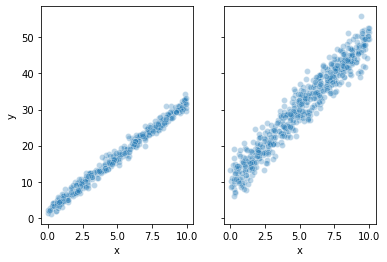

In [321]:
fig, ax =plt.subplots(1,2, sharey=True)
sns.scatterplot(data=df[df.label == 0],x='x', y='y', alpha=0.3,ax=ax[0])
sns.scatterplot(data=df[df.label == 1],x='x', y='y', alpha=0.3,ax=ax[1])


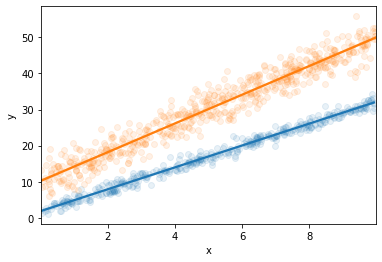

In [322]:
sns.regplot(data=df[df.label == 0],x='x', y='y',scatter_kws={'alpha':0.1})
sns.regplot(data=df[df.label == 1],x='x', y='y',scatter_kws={'alpha':0.1})


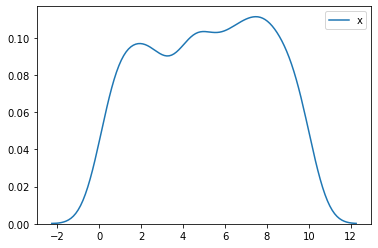

In [323]:
sns.kdeplot(data=df.x)

# Second part: mathematical background 

To Do !

# Third part: Implementation of the EM algorithm 

## Initialization 

In [324]:
import scipy.stats

In [325]:
# initialization of the parameter
variance_a = random.randint(1, 3) #needs to be >= 0
variance_b = random.randint(1, 3) #needs to be >= 0

beta_a0 = beta_b0 = 0
beta_a1 = beta_b1 = 1
prob_a = 0.5
prob_b = 0.5

parameter_list = [beta_a0,beta_a1,variance_a,variance_b,beta_b0,beta_b1,prob_a,prob_b]
parameter_list

[0, 1, 2, 2, 0, 1, 0.5, 0.5]

In [326]:
df

,x,label,noise_a,noise_b,y
0,3.872340,1,1.044146,-2.635183,22.854178
1,0.617154,1,0.623034,5.101949,17.570567
2,6.962236,1,0.233301,3.330161,41.179106
3,4.020162,1,-0.507225,-1.202816,24.877834
4,7.658071,1,-1.637698,0.173279,40.805565
...,...,...,...,...,...
995,9.232815,0,-0.492070,-3.383096,29.206376
996,9.701906,1,0.312617,0.737891,49.545514
997,4.282489,1,-1.517656,0.071098,27.201055
998,5.087786,0,0.876415,-1.850530,18.139772


In [327]:
w_a =  prob_a * scipy.stats.norm(df.y - beta_a0 - beta_a1*df.x, variance_a).cdf(df.x)
w_b =  prob_b * scipy.stats.norm(df.y - beta_b0 - beta_b1*df.x, variance_b).cdf(df.x)

In [328]:
w  = pd.DataFrame(data = {'a': w_a, 'b':w_b})
w['a'].describe()

count    1.000000e+03
mean     4.500752e-03
std      1.777734e-02
min      4.422275e-77
25%      1.156559e-29
50%      2.962574e-12
75%      8.779154e-06
max      1.854121e-01
Name: a, dtype: float64

In [307]:
#w_a = prob_a * (1/np.sqrt(2*np.pi*variance_a)) * np.exp((-(1/(2*variance_a)) * (df.y - beta_a0 - beta_a1*df.x)**2))
#w_b = prob_b * (1/np.sqrt(2*np.pi*variance_b)) * np.exp((-(1/(2*variance_b)) * (df.y - beta_b0 - beta_b1*df.x)**2))

## Expectation step

In [329]:
##Expectation step
def Estep(parameter_list):
    
    beta_a0=parameter_list[0]
    beta_a1=parameter_list[1]
    variance_a=parameter_list[2]
    variance_b=parameter_list[3]
    beta_b0 = parameter_list[4]
    beta_b1 = parameter_list[5]
    prob_a = parameter_list[6]
    prob_b = parameter_list[7]
    
    #Set the values for the algorithm
    w_a =  prob_a * scipy.stats.norm(df.y - beta_a0 - beta_a1*df.x, variance_a).cdf(df.x)
    w_b =  prob_b * scipy.stats.norm(df.y - beta_b0 - beta_b1*df.x, variance_b).cdf(df.x)
    #w_a = prob_a * (1/np.sqrt(2*np.pi*variance_a)) * np.exp((-1/(2*variance_a) * (df.y - beta_a0 - beta_a1*df.x)**2))
    #w_b = 1-w_a
    #w_b = prob_b * (1/np.sqrt(2*np.pi*variance_b)) * np.exp((-1/(2*variance_b) * (df.y - beta_b0 - beta_b1*df.x)**2))
    
    return(w_a,w_b)


## Maximisation step

In [330]:
## Maximisation step:
def Mstep(w_a, w_b, parameter_list, df):
    
    beta_a0=parameter_list[0]
    beta_a1=parameter_list[1]
    variance_a=parameter_list[2]
    variance_b=parameter_list[3]
    beta_b0 = parameter_list[4]
    beta_b1 = parameter_list[5]
    prob_a = parameter_list[6]
    prob_b = parameter_list[7]
    
    #w_a = Estep(parameter_list)[0]
    #w_b = Estep(parameter_list)[1]
    
    #Update the function following the derived update rules:
    
    #Update the prior beliefs
    prob_a = w_a.sum()/(w_a +w_b).sum()
    prob_b = w_a.sum()/(w_a +w_b).sum()
    #print('prob', prob_a,prob_b)
    
    #Update the betas for each subgroup
    #Beta_0
    
    beta_a0 = ((df.y - beta_a1*df.x)*w_a).sum()/w_a.sum() 
    beta_b0 = ((df.y - beta_b1*df.x)*w_b).sum()/w_b.sum() 
    #print('beta0', beta_a0, beta_b0)
    #beta_1
    
    beta_a1 = ((df.y - beta_a0)*w_a).sum()/(w_a*df.x).sum() 
    beta_b1 = ((df.y - beta_b0)*w_b).sum()/(w_b*df.x).sum() 
    #print('beta1', beta_a1, beta_b1)
    
    #Update the variance 
    #Define the residuals first
    e_hat_a = df.y - beta_a0-beta_a1*df.x
    e_hat_b = df.y - beta_b0-beta_b1*df.x
    #print('ehat', e_hat_a, e_hat_b)
    
    #Define the variance 
    #print(w_a.sum())
    variance_a = ((e_hat_a**2)*w_a).sum()/w_a.sum()
    variance_b = ((e_hat_b**2)*w_b).sum()/w_b.sum()
    #print('variance', variance_a)
    
    #print(variance_a, variance_b)
    #Store the new parameters in a parameter_list
    parameter_list = [beta_a0,beta_a1,variance_a,variance_b,beta_a0,beta_a1,beta_b0,beta_b1,prob_a,prob_b]
    return parameter_list
    

In [331]:
Mstep(w_a,w_b, parameter_list,df)

[3.5410912159372545,
 1.0,
 3.1572275722581415,
 3.1572275722581415,
 3.5410912159372545,
 1.0,
 3.5410912159372545,
 1.0,
 0.5,
 0.5]

## Defining the average likelihood function

In [332]:
def get_avg_log_likelihood(w_a,w_b,df, parameter_list):
    x = df.x
    beta_a0=parameter_list[0]
    beta_a1=parameter_list[1]
    variance_a=parameter_list[2]
    variance_b=parameter_list[3]
    beta_b0 = parameter_list[4]
    beta_b1 = parameter_list[5]
    prob_a = parameter_list[6]
    prob_b = parameter_list[7]   
    
    Q_function_a = -1/2*((w_a*((df.y-beta_a0-beta_a1*df.x)**2-math.log(variance_a))).sum())
    Q_function_b = -1/2*((w_b*((df.y-beta_b0-beta_b1*df.x)**2-math.log(variance_b))).sum())
    
    #Q_function_a = -(1/2)*(((df.y-beta_a0-beta_a1*df.x)**2/variance_a -math.log(variance_a))*w_a).sum() + (math.log(prob_a)*w_a).sum()
    #Q_function_b = -(1/2)*(((df.y-beta_b0-beta_b1*df.x)**2/variance_b -math.log(variance_b))*w_b).sum() + (math.log(prob_b)*w_b).sum()
    
    Q_function = Q_function_a + Q_function_b
    
    return Q_function

In [333]:
def run_em(df, parameter_list):
    avg_loglikelihoods = []
    while True:
        #Estimation step
        w_a = Estep(parameter_list)[0] 
        w_b = Estep(parameter_list)[1]
        
        #Maximisation step:
        parameter_list = Mstep(w_a,w_b,parameter_list,df) #Update the maximisation step
        
        #Evaluate the loglikelihood function
        avg_loglikelihood = get_avg_log_likelihood(w_a,w_b,df, parameter_list)
        avg_loglikelihoods.append(avg_loglikelihood)
        if len(avg_loglikelihoods) > 2 and abs(avg_loglikelihoods[-1] - avg_loglikelihoods[-2]) < 0.001: #Define a stopping criterion
            break
        #parameter_list = M_step(x_unlabeled, params)
    
    return parameter_list, avg_loglikelihoods

In [334]:
test = run_em(df, parameter_list)

In [337]:
test

([19.61873301457013,
  1.0000000000000009,
  102.26448046179353,
  102.26448046179351,
  19.61873301457013,
  1.0000000000000009,
  19.61873301457013,
  1.0000000000000007,
  0.9515004147296098,
  0.9515004147296098],
 [-9.035408875281291,
  -2373.742428243376,
  -71854.05768605872,
  -369704.398880684,
  -509820.98687805654,
  -520638.49243866623,
  -520959.89971212926,
  -520968.57477120537,
  -520968.8079756332,
  -520968.81424380763,
  -520968.81441228575])